# A Brief Introduction to Computer Vision using Keras

Computer Vision, often abbreviated as CV, is defined as a field of study that seeks to develop techniques to help computers “see” and understand the content of digital images such as photographs and videos (sequences of images).

The problem of computer vision appears simple because it is trivially solved by people, even very young children. Nevertheless, it largely remains an unsolved problem based both on the limited understanding of biological vision and because of the complexity of vision perception in a dynamic and nearly infinitely varying physical world.

## What Is Computer Vision?
Computer vision is a field of study focused on the problem of helping computers to see.

It is a multidisciplinary field that could broadly be called a subfield of __artificial intelligence__ and __machine learning__, which may involve the use of specialized methods and make use of general learning algorithms.

The goal of computer vision is to __understand the content__ of digital images. Typically, this involves developing methods that attempt to reproduce the capability of human vision. Usually computer vision involves takes of assigning images to predefined labels, thus, they are __classification problems__.

## Tasks in Computer Vision
Nevertheless, there has been progress in the field, especially in recent years with commodity systems for optical character recognition and face detection in cameras and smartphones.

Many popular computer vision applications involve trying to recognize things in photographs; for example:

- __Object Classification__: What broad category of object is in this photograph?
- __Object Identification__: Which type of a given object is in this photograph?
- __Object Verification__: Is the object in the photograph?
- __Object Detection__: Where are the objects in the photograph?
- __Object Landmark Detection__: What are the key points for the object in the photograph?
- __Object Segmentation__: What pixels belong to the object in the image?
- __Object Recognition__: What objects are in this photograph and where are they?

Other common examples are related to information retrieval; for example: finding images like an image or images that contain an object.

Without further overdue, let's get started on building our first computer vision models.

## Part 1: Fashion MNIST with Keras

In this tutorial you will learn how to train a simple Convolutional Neural Network (CNN) with Keras on the Fashion MNIST dataset, enabling you to classify fashion images and categories.

The Fashion MNIST dataset is meant to be a (slightly more challenging) drop-in replacement for the (less challenging) MNIST dataset. This dataset is created by the e-commerce company, [Zolando](https://zalando.com/).

![fashion MNIST](https://tensorflow.org/images/fashion-mnist-sprite.png)

The Fashion MNIST dataset is identical to the MNIST dataset in terms of training set size, testing set size, number of class labels, and image dimensions:

- `60,000` training examples
- `10,000` testing examples
- `10` classes
- `28×28` grayscale images

If you’ve ever trained a network on the MNIST digit dataset then you can essentially change one or two lines of code and train the same network on the Fashion MNIST dataset!

The classes in the Fashion MNIST are:

| Label | Class |
| ----- | ----- |
| 0 | T-shirts/Top |
| 1 | Trousers |
| 2 | Pullovers |
| 3 | Dresses |
| 4 | Coats |
| 5 | Sandals |
| 6 | Shirts |
| 7 | Sneakers |
| 8 | (Hand) Bags |
| 9 | Ankle Boots |

Let's first load the required packages.

In [ ]:
# import required packages
# specify the version of tensorflow
# %tensorflow_version 1.x
# import tensorflow as tf
# print(tf.__version__)

import tensorflow as tf
# you should always check the version of your ``Tensorflow``
tf.__version__

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Data
Now we can load the data - which is provided with Keras.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


### Explore the Data

Let's explore the format of the dataset before training the model. The following shows there are `60,000` images in the training set, with each image represented as `28 x 28` pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Let's check the labels of the training data.

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Keep in mind the labels correspond to the class names, which are defined below.


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### YOUR TURN HERE

Write code to investigate the dimensions and labels of the test data.

In [ ]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


We can plot any train image to see what do they look like.

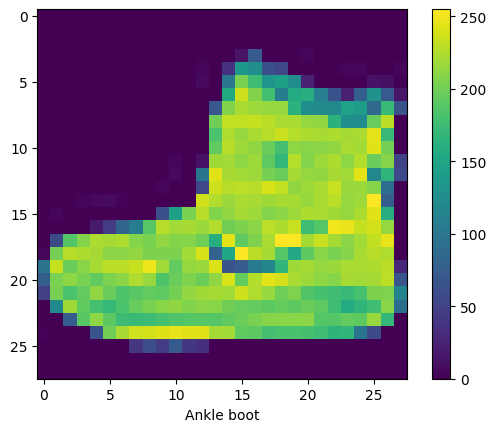

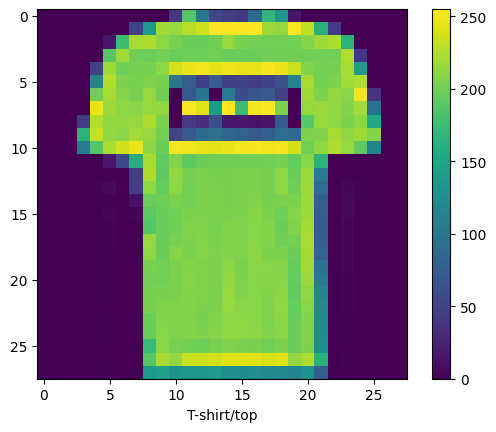

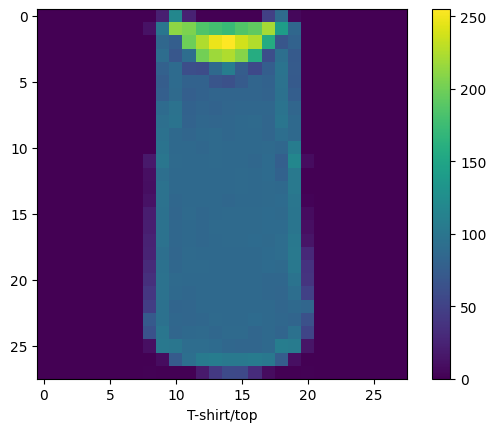

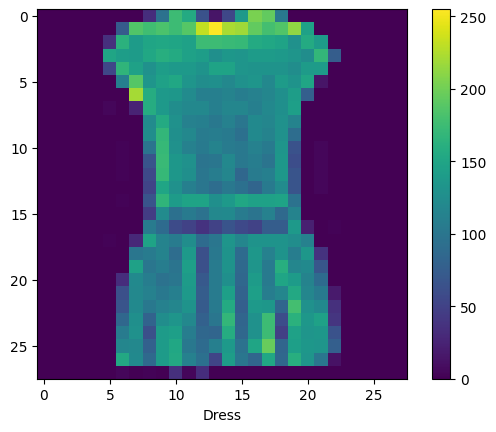

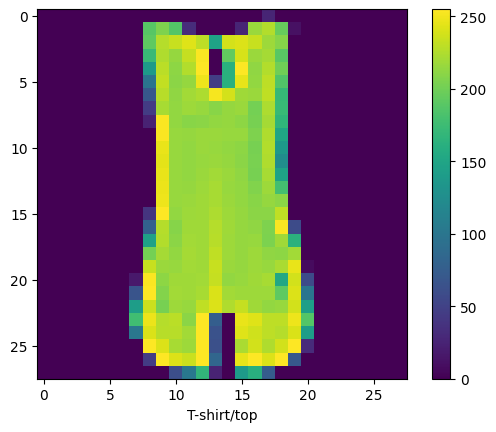

In [ ]:
plt.figure()
for i in range(5):
  #plt.subplot(5,1,i+1)
  plt.imshow(train_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

### Preprocess the Images

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first `25` images from the training set and display the class name below each image.

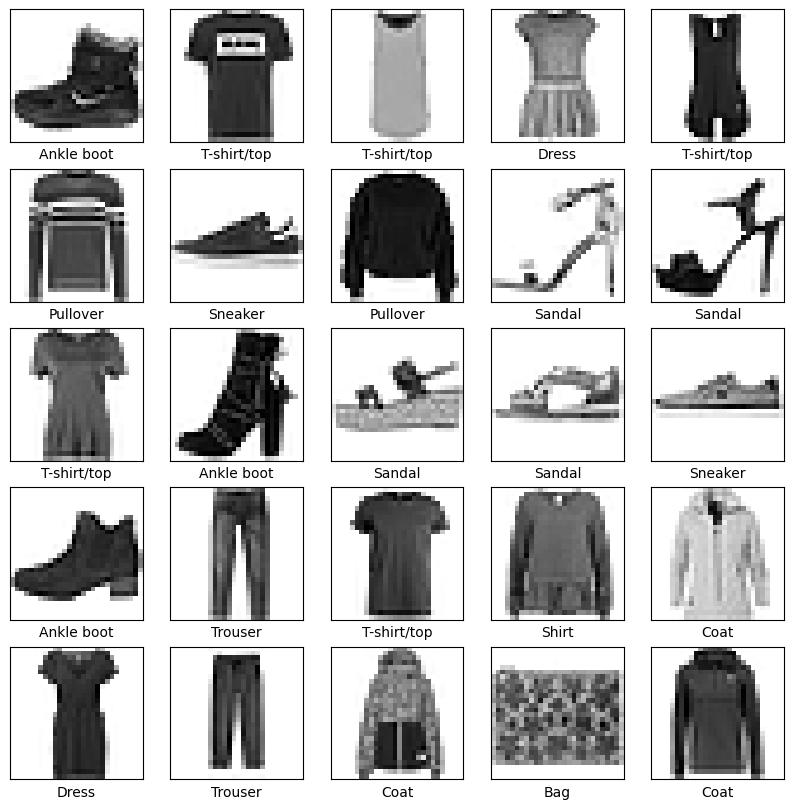

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building the First Model

Building the neural network requires configuring the layers of the model, then compiling the model.

The first model we are going to build is the Multi Layer Perceptron (MLP) model. This is the basic neural network model with `Dense` layers only.

See below code block:

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

mlp_model = Sequential([
    Flatten(input_shape=(28, 28)), # input layer with the dimension of the image
    Dense(128, activation='relu'), # one hidden layer with 128 neurons
    Dense(10) # output layer: 10 probabilities toward 10 classes
])

The first layer in this network, `Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of $28 \times 28 = 784$ pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has `128` nodes (or neurons). The second (and last) layer returns a logits array with length of `10`. Each node contains a score that indicates the current image belongs to one of the `10` classes.

### Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's __compile__ step:

- _Loss function_: This measures how __accurate__ the model is during training. You want to minimize this function to "steer" the model in the right direction.
- _Optimizer_: This is how the model is updated based on the training data and the loss function.
- _Metrics_: Used to monitor the training and testing steps. The following example uses __accuracy__, the fraction of the images that are correctly classified.

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
mlp_model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

We can investigate the structure of the `mlp_model`.

In [ ]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


This is a very important step - almost required in every deep learning models. This table give you important information such as the layers, the output shapes, and the parameters to be learned.

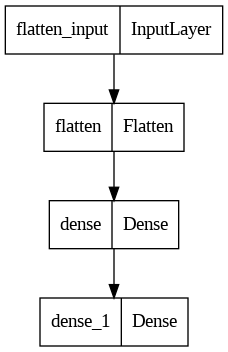

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(mlp_model, to_file='mlp_model.png')

### Train the model
Training the neural network model requires the following steps:

1. Fit the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.

#### Feed the model
To start training, call the `model.fit` method—so called because it "fits" the model to the training data:

In [ ]:
mlp_hist = mlp_model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 12s 4ms/step - loss: 0.5106 - accuracy: 0.8219 - val_loss: 0.4093 - val_accuracy: 0.8567
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3830 - accuracy: 0.8619 - val_loss: 0.3795 - val_accuracy: 0.8612
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3406 - accuracy: 0.8757 - val_loss: 0.3454 - val_accuracy: 0.8737
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3172 - accuracy: 0.8846 - val_loss: 0.3498 - val_accuracy: 0.8715
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2995 - accuracy: 0.8894 - val_loss: 0.3300 - val_accuracy: 0.8773
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2838 - accuracy: 0.8947 - val_loss: 0.3292 - val_accuracy: 0.8815
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2695 - accuracy: 0.8997 - val_loss: 0.3406 - val_accuracy

We can also plot the training history in terms of training/validation loss and accuracy.

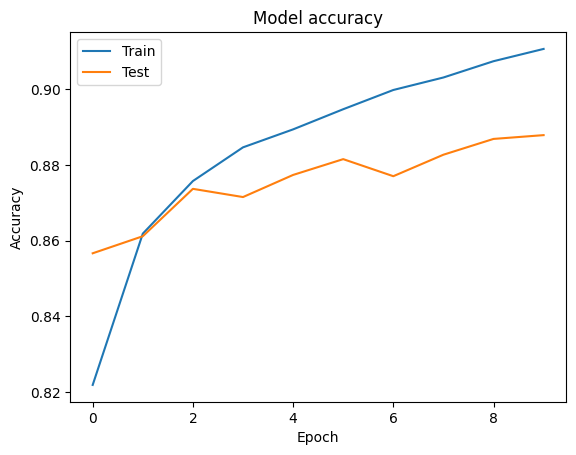

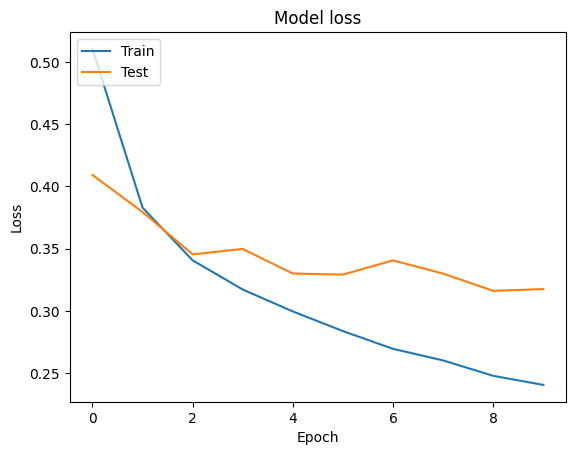

In [ ]:
# Plot training & validation accuracy values
plt.plot(mlp_hist.history['accuracy'])
plt.plot(mlp_hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(mlp_hist.history['loss'])
plt.plot(mlp_hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = mlp_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3429 - accuracy: 0.8836 - 571ms/epoch - 2ms/step

Test accuracy: 0.8835999965667725


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:

- [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

Instead of evaluate, we can ask the treined model `mlp_model` for the _predicted_ labels for the `test_images`.

In [ ]:
predictions = mlp_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([-10.048919 , -20.533884 , -12.848033 , -22.817228 , -13.608593 ,
        -3.2893631,  -8.064305 ,  -0.9258648, -13.663328 ,   3.3957288],
      dtype=float32)

From above results, clearly the results `predictions` are not normalized (i.e. between `[0, 1]`). We can attach a `softmax` layer to convert the logits to probabilities, which are easier to interpret.

In [ ]:
from tensorflow.keras.layers import Softmax
probability_model = Sequential([mlp_model, Softmax()])

pred_labels = probability_model.predict(test_images)
pred_labels[0]

313/313 [==============================] - 0s 1ms/step


array([1.42821762e-06, 3.99237934e-11, 8.69270522e-08, 4.06993970e-12,
       4.06300664e-08, 1.23149378e-03, 1.03920465e-05, 1.30883968e-02,
       3.84659344e-08, 9.85668182e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value.

The results are easier to our eyes. But to find out which class has the highest probability, we can use `np.argmax()`.

In [ ]:
np.argmax(predictions[0]) # ankle boots

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

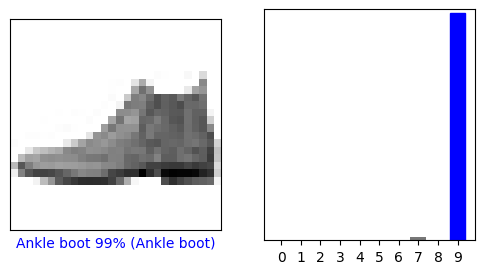

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_labels[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred_labels[i],  test_labels)
plt.show()

Below is a wrong prediction example.

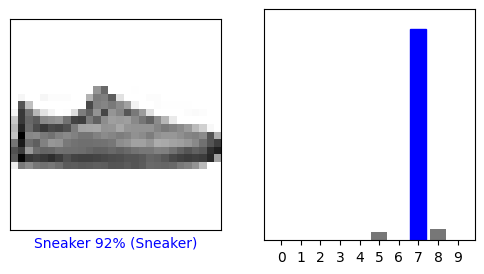

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_labels[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred_labels[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

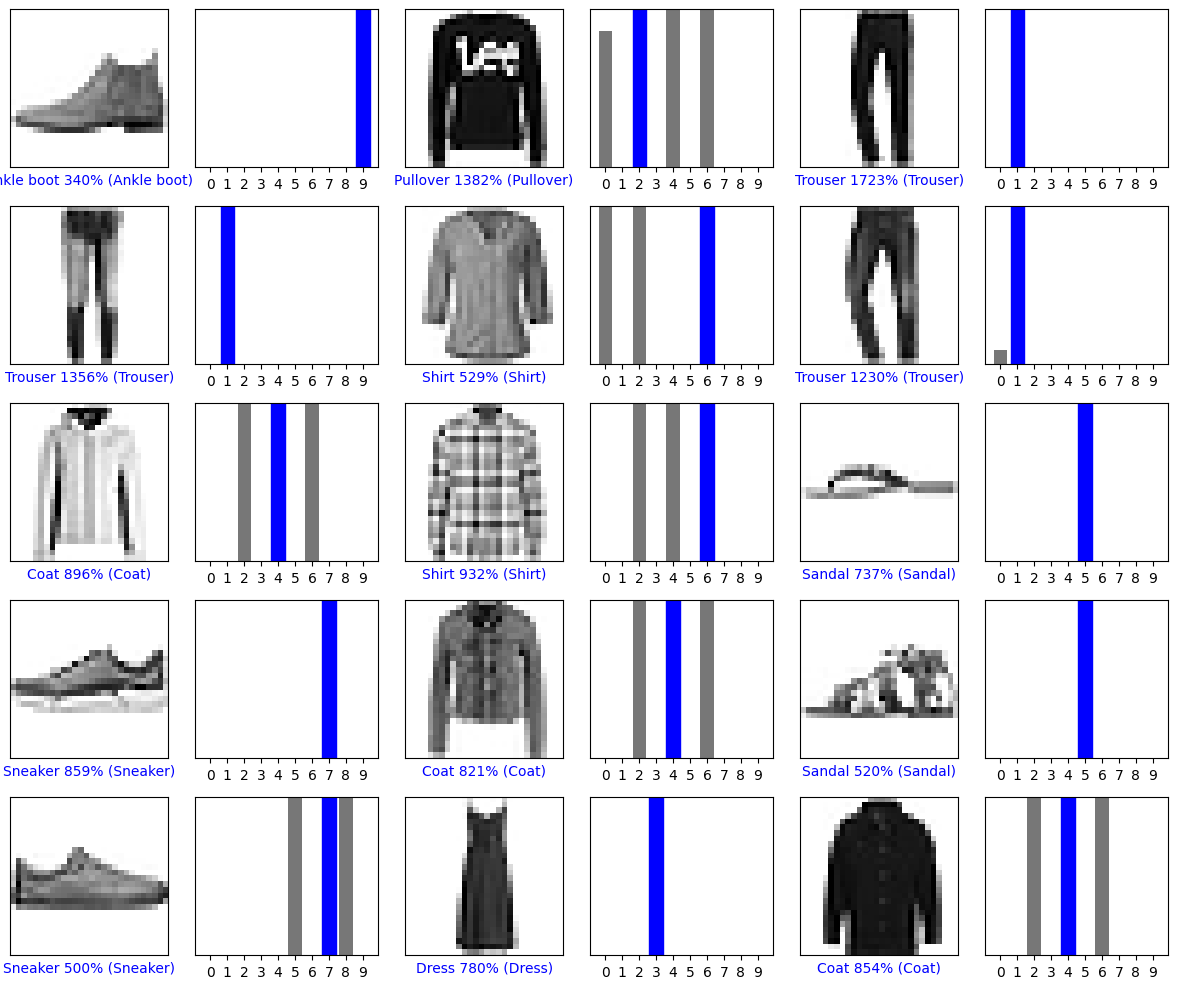

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1001]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[7.3996060e-05 2.2795259e-06 6.7324465e-05 9.9920279e-01 3.4863793e-04
  3.8358931e-07 2.6653637e-04 6.4812163e-14 3.8082388e-05 6.9529454e-10]]


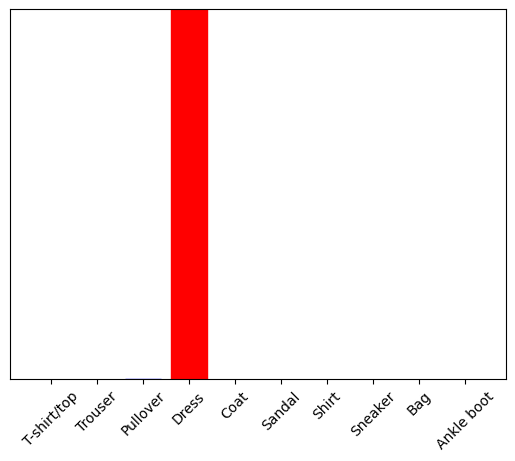

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

### Building an Improved Model

We can use a 2-D convolutional neural network model for the improved results.

The model has two main aspects:
- the feature extraction front end comprised of convolutional and pooling layers, and
- the classifier backend that will make a prediction.

For the convolutional front-end, we can start with a single convolutional layer with a small filter size `(3,3)` and a modest number of filters (`32`) followed by a max pooling layer. The filter maps can then be flattened to provide features to the classifier.

Given that the problem is a multi-class classification, we know that we will require an output layer with 10 nodes in order to predict the probability distribution of an image belonging to each of the 10 classes. This will also require the use of a __softmax__ activation function. Between the feature extractor and the output layer, we can add a dense layer to interpret the features, in this case with `100` nodes.

The convolution/max pooling pair works as following:
![ConvNet](https://i0.wp.com/www.jessicayung.com/wp-content/uploads/2017/05/Typical_cnn.png?fit=1040%2C320&ssl=1)

All layers will use the `ReLU` activation function and the He weight initialization scheme, both best practices.

We will use a conservative configuration for the __stochastic gradient descent__ optimizer (SGD) with a learning rate of `0.01` and a momentum of `0.9`. The categorical cross-entropy loss function will be optimized, suitable for multi-class classification, and we will monitor the classification accuracy metric, which is appropriate given we have the same number of examples in each of the 10 classes.


Before we use the convolutional model, we need to reshape our data to add 1 dimension (which is the color channel). We add the value as 1 meaning the images are in grey scale.

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

conv_model = Sequential()
conv_model.add(Conv2D(64, kernel_size=2, padding='same', activation='relu',  input_shape=(28, 28, 1)))
conv_model.add(MaxPooling2D(pool_size=2))
conv_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
conv_model.add(MaxPooling2D(pool_size=2))
conv_model.add(Flatten())
conv_model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
conv_model.add(Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
# compile model
opt = SGD(lr=0.01, momentum=0.9)
conv_model.compile(optimizer=opt, loss=SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

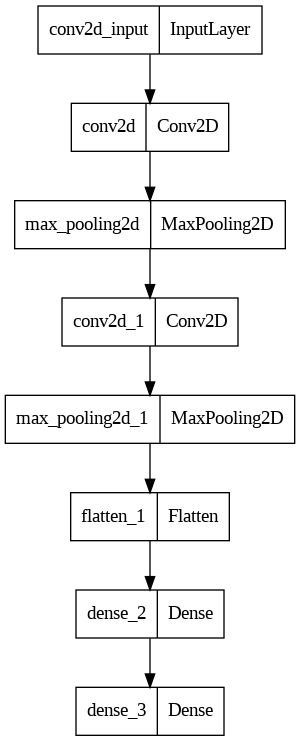

In [ ]:
plot_model(conv_model)

In [ ]:
# train model

conv_hist = conv_model.fit(train_images, train_labels, epochs=20, validation_split=0.1, batch_size=64)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


844/844 [==============================] - 11s 6ms/step - loss: 0.6262 - accuracy: 0.7740 - val_loss: 0.4575 - val_accuracy: 0.8327
Epoch 2/20
844/844 [==============================] - 5s 6ms/step - loss: 0.3909 - accuracy: 0.8581 - val_loss: 0.3752 - val_accuracy: 0.8657
Epoch 3/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3412 - accuracy: 0.8764 - val_loss: 0.3286 - val_accuracy: 0.8802
Epoch 4/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3018 - accuracy: 0.8899 - val_loss: 0.3051 - val_accuracy: 0.8888
Epoch 5/20
844/844 [==============================] - 5s 5ms/step - loss: 0.2825 - accuracy: 0.8957 - val_loss: 0.2862 - val_accuracy: 0.8942
Epoch 6/20
844/844 [==============================] - 4s 5ms/step - loss: 0.2633 - accuracy: 0.9025 - val_loss: 0.2928 - val_accuracy: 0.8932
Epoch 7/20
844/844 [==============================] - 4s 5ms/step - loss: 0.2485 - accuracy: 0.9081 - val_loss: 0.2725 - val_accuracy: 0.9040
Epoch 8/20
844/8

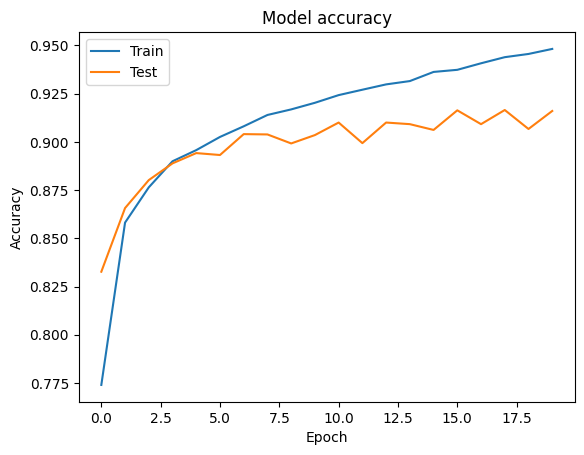

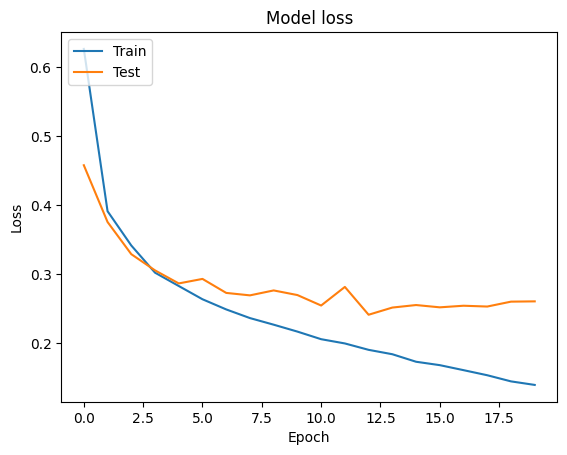

In [ ]:
# Plot training & validation accuracy values
plt.plot(conv_hist.history['accuracy'])
plt.plot(conv_hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(conv_hist.history['loss'])
plt.plot(conv_hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
_, test_acc = conv_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2991 - accuracy: 0.9063 - 769ms/epoch - 2ms/step

Test accuracy: 0.9063000082969666


You can observe that even though the training results are not as good as the MLP model, the testing results are slightly better.

### Take 3: A Further Improved Model

We can further improve the results by adding a `Dropout` layer in our model.

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

In [ ]:
from tensorflow.keras.layers import Dropout

conv_model2 = Sequential()
conv_model2.add(Conv2D(64, kernel_size=2, padding='same', activation='relu',  input_shape=(28, 28, 1)))
conv_model2.add(MaxPooling2D(pool_size=2))
conv_model2.add(Dropout(0.4))
conv_model2.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
conv_model2.add(MaxPooling2D(pool_size=2))
conv_model2.add(Dropout(0.4))
conv_model2.add(Flatten())
conv_model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
conv_model2.add(Dropout(0.4))
conv_model2.add(Dense(10, activation='softmax'))

In [ ]:
# compile the model
conv_model2.compile(optimizer="adam", loss=SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])
conv_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

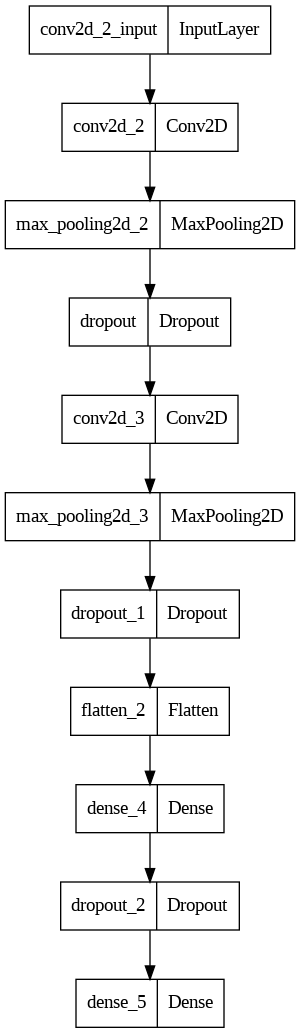

In [ ]:
plot_model(conv_model2)

In [ ]:
# train model

conv_hist2 = conv_model2.fit(train_images, train_labels, epochs=20, validation_split=0.1, batch_size=64)

Epoch 1/20
844/844 [==============================] - 7s 5ms/step - loss: 0.6903 - accuracy: 0.7434 - val_loss: 0.4338 - val_accuracy: 0.8405
Epoch 2/20
844/844 [==============================] - 4s 5ms/step - loss: 0.4803 - accuracy: 0.8268 - val_loss: 0.3696 - val_accuracy: 0.8662
Epoch 3/20
844/844 [==============================] - 5s 6ms/step - loss: 0.4348 - accuracy: 0.8426 - val_loss: 0.3417 - val_accuracy: 0.8773
Epoch 4/20
844/844 [==============================] - 4s 5ms/step - loss: 0.4034 - accuracy: 0.8536 - val_loss: 0.3138 - val_accuracy: 0.8817
Epoch 5/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3865 - accuracy: 0.8585 - val_loss: 0.3030 - val_accuracy: 0.8862
Epoch 6/20
844/844 [==============================] - 5s 6ms/step - loss: 0.3681 - accuracy: 0.8657 - val_loss: 0.2965 - val_accuracy: 0.8862
Epoch 7/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3546 - accuracy: 0.8692 - val_loss: 0.2829 - val_accuracy: 0.8940
Epoch 

Let's look at the training process again.

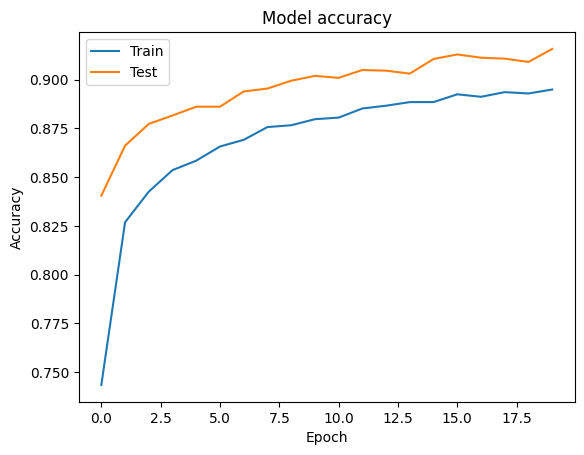

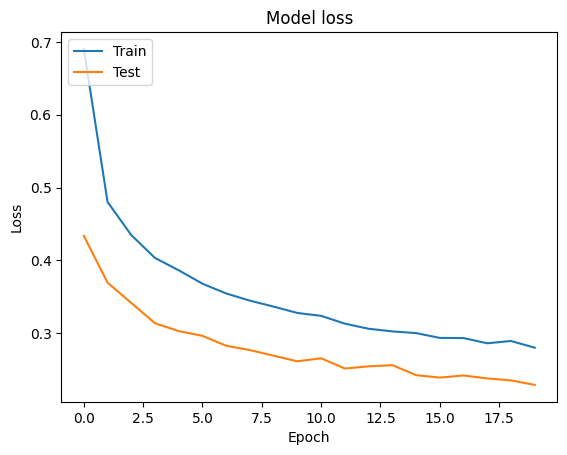

In [ ]:
# Plot training & validation accuracy values
plt.plot(conv_hist2.history['accuracy'])
plt.plot(conv_hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(conv_hist2.history['loss'])
plt.plot(conv_hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

You can observe that both curves are smoother - that usually means the training process is better.

In [ ]:
_, test_acc = conv_model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2446 - accuracy: 0.9106 - 642ms/epoch - 2ms/step

Test accuracy: 0.9106000065803528


We can see the model performance further improved.

## Homework

Based on the further improved model `conv_model2`, tweak it to see how to improve the results.

You can consider:
- adding more layers
- change the activation function
- change number of filters in the convolution layer
- change the optimizer

Report your best model and its performance before submission.

In [ ]:
from tensorflow.keras.layers import Dropout

conv_model3 = Sequential()
conv_model3.add(Conv2D(128, kernel_size=2, padding='same', activation='relu',  input_shape=(28, 28, 1)))
conv_model3.add(MaxPooling2D(pool_size=2))
conv_model3.add(Dropout(0.4))
conv_model3.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
conv_model3.add(MaxPooling2D(pool_size=2))
conv_model3.add(Dropout(0.4))
conv_model3.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
conv_model3.add(MaxPooling2D(pool_size=2))
conv_model3.add(Dropout(0.4))
conv_model3.add(Flatten())
conv_model3.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
conv_model3.add(Dropout(0.4))
conv_model3.add(Dense(10, activation='softmax'))

In [ ]:
opt ### need to as weight_decay//regularization

In [ ]:
# compile the model
conv_model3.compile(optimizer="adam", loss=SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'], weight_decay=1e-5)
conv_model3.summary()

TypeError: ignored

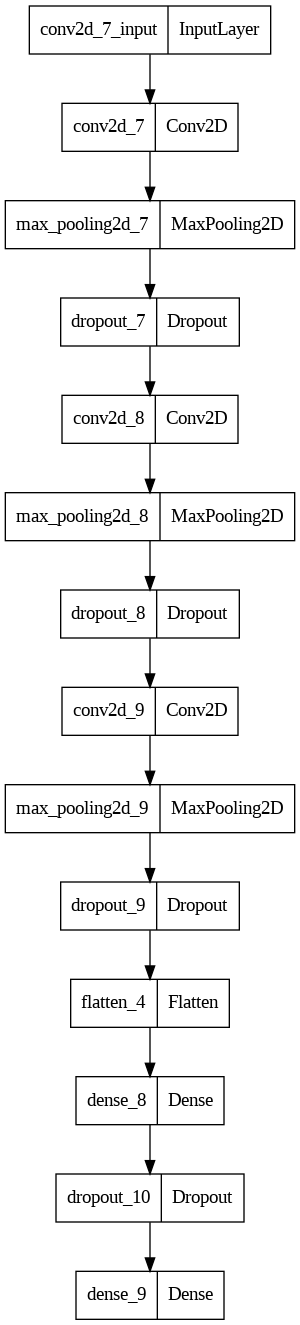

In [ ]:
plot_model(conv_model3)

In [ ]:
conv_hist3 = conv_model3.fit(train_images, train_labels, epochs=20, validation_split=0.1, batch_size=64)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


844/844 [==============================] - 9s 8ms/step - loss: 0.9777 - accuracy: 0.6255 - val_loss: 0.5444 - val_accuracy: 0.7872
Epoch 2/20
844/844 [==============================] - 6s 7ms/step - loss: 0.6188 - accuracy: 0.7654 - val_loss: 0.4461 - val_accuracy: 0.8368
Epoch 3/20
844/844 [==============================] - 7s 8ms/step - loss: 0.5472 - accuracy: 0.7978 - val_loss: 0.3953 - val_accuracy: 0.8510
Epoch 4/20
844/844 [==============================] - 6s 7ms/step - loss: 0.5029 - accuracy: 0.8150 - val_loss: 0.3629 - val_accuracy: 0.8665
Epoch 5/20
844/844 [==============================] - 7s 8ms/step - loss: 0.4681 - accuracy: 0.8284 - val_loss: 0.3454 - val_accuracy: 0.8695
Epoch 6/20
844/844 [==============================] - 6s 7ms/step - loss: 0.4436 - accuracy: 0.8389 - val_loss: 0.3377 - val_accuracy: 0.8770
Epoch 7/20
844/844 [==============================] - 7s 8ms/step - loss: 0.4284 - accuracy: 0.8439 - val_loss: 0.3124 - val_accuracy: 0.8848
Epoch 8/20
844/84

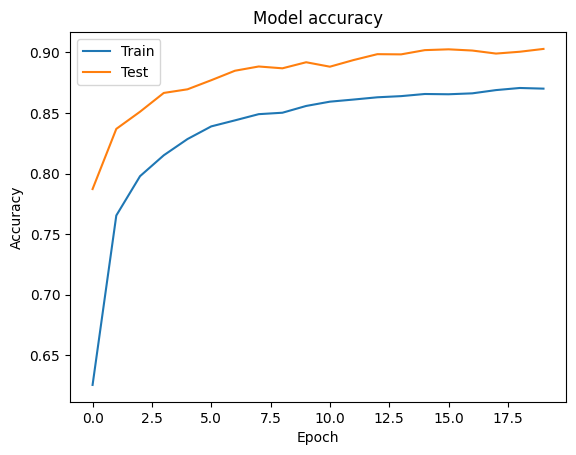

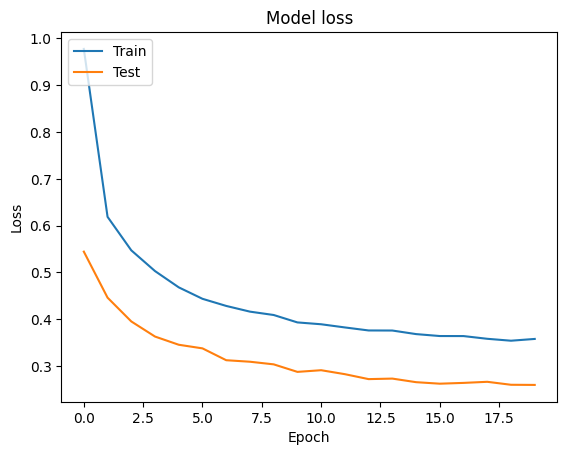

In [ ]:
# Plot training & validation accuracy values
plt.plot(conv_hist3.history['accuracy'])
plt.plot(conv_hist3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(conv_hist3.history['loss'])
plt.plot(conv_hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()